# Rotten Tomatos Datasets Playground

Exploring the Rotten Tomatos datasets here: rt.movie_info.tsv and rt.reviews.tsv

There are 1562 lines in rt.movie_info.tsv but ran into a error upon read_csv(). Set the para 'error_bad_lines' to False so the bad lines would be skipped. 1560 lines/records were read in. So only 2 lines were dropped. 

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

# set up pandas to display floats in a more human friendly way
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
rt_movie_info_df = pd.read_csv('./zippedData/rt.movie_info.tsv.gz', sep='\t', error_bad_lines=False, warn_bad_lines=True)
rt_movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


Check for duplicates in the data

In [4]:
rt_movie_info_dups = rt_movie_info_df[rt_movie_info_df.duplicated()]
print(len(rt_movie_info_dups))

0


In [5]:
print(rt_movie_info_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB
None


Only 340 of 1560 records in rt.movie_info.tsv had non-null values for box_office. This is ~20% of the data. 

When discussing any analysis that involves box_office, make sure you mention that this is for 340 movies not 1560 (whole dataset). 

In [7]:
rt_reviews_df = pd.read_csv('./zippedData/rt.reviews.tsv.gz', sep='\t', encoding='latin1', error_bad_lines=False, warn_bad_lines=True)
rt_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


Check for duplicates in the data and drop any duplicates, keeping first column

In [8]:
# Select duplicate rows except first occurrence based on all columns
rt_review_dups = rt_reviews_df[rt_reviews_df.duplicated()]
print(len(rt_review_dups))

9


In [9]:
rt_reviews_df.drop_duplicates()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [10]:
print(rt_reviews_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB
None


The rt.reviews dataset includses data on review, rating, fresh, critic, top_critic, publisher, date. 

Inspecting the unique values of the critic-provided 'ratings' reveals that these values vary widely, using 
letter grades and numeric ratings of differing scales 2/4 vs 9/10:

In [11]:
rt_reviews_df.rating.unique()

array(['3/5', nan, 'C', '2/5', 'B-', '2/4', 'B', '3/4', '4/5', '4/4',
       '6/10', '1/4', '8', '2.5/4', '4/10', '2.0/5', '3/10', '7/10', 'A-',
       '5/5', 'F', '3.5/4', 'D+', '1.5/4', '3.5/5', '8/10', 'B+', '9/10',
       '2.5/5', '7.5/10', '5.5/10', 'C-', '1.5/5', '1/5', '5/10', 'C+',
       '0/5', '6', '0.5/4', 'D', '3.1/5', '3/6', '4.5/5', '0/4', '2/10',
       'D-', '7', '1/10', '3', 'A+', 'A', '4.0/4', '9.5/10', '2.5',
       '2.1/2', '6.5/10', '3.7/5', '8.4/10', '9', '1', '7.2/10', '2.2/5',
       '0.5/10', '5', '0', '2', '4.5', '7.7', '5.0/5', '8.5/10', '3.0/5',
       '0.5/5', '1.5/10', '3.0/4', '2.3/10', '4.5/10', '4/6', '3.5',
       '8.6/10', '6/8', '2.0/4', '2.7', '4.2/10', '5.8', '4', '7.1/10',
       '5/4', 'N', '3.5/10', '5.8/10', 'R', '4.0/5', '0/10', '5.0/10',
       '5.9/10', '2.4/5', '1.9/5', '4.9', '7.4/10', '1.5', '2.3/4',
       '8.8/10', '4.0/10', '2.2', '3.8/10', '6.8/10', '7.3', '7.0/10',
       '3.2', '4.2', '8.4', '5.5/5', '6.3/10', '7.6/10', '8.1/10',
  

Rotten Tomatoes standardizes movie ratings by deeming that a movie is either fresh (good) or rotten (not that good). This is the 'fresh' column and it contains a string ("fresh"/"rotten").  

I'm opting to use the RT fresh/rotten metric for rating a movie and to drop the critic-provided 'rating' column

Since there can be multiple 'fresh' ratings for a single movie. We want the average 'fresh' rating. In order to get the average fresh rating, convert "fresh"/"rotten" to 1/0 and get the average. A movie with all "fresh" will be have 1.0 average, all "rotten" will have 0.0 average...the average fresh rating will be between 0-1.


More details on the Tomatometer here: https://www.rottentomatoes.com/about#whatisthetomatometer

In [12]:
rt_reviews_df.drop(['rating'], axis=1, inplace=True)

In [14]:
rt_reviews_df['fresh_score'] = rt_reviews_df.apply(lambda row: 1 if row.fresh=='fresh' else 0, axis=1)
rt_reviews_df.head()

,id,review,fresh,critic,top_critic,publisher,date,fresh_score
0,3,A distinctly gallows take on contemporary fina...,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",1
1,3,It's an allegory in search of a meaning that n...,rotten,Annalee Newitz,0,io9.com,"May 23, 2018",0
2,3,... life lived in a bubble in financial dealin...,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018",1
3,3,Continuing along a line introduced in last yea...,fresh,Daniel Kasman,0,MUBI,"November 16, 2017",1
4,3,... a perverse twist on neorealism...,fresh,NaN,0,Cinema Scope,"October 12, 2017",1


In [15]:
print(rt_reviews_df.groupby(['id'])['fresh_score'].mean())

id
3      0.63
5      0.78
6      0.56
8      0.75
10     0.46
       ... 
1996   0.67
1997   0.36
1998   1.00
1999   0.59
2000   0.47
Name: fresh_score, Length: 1135, dtype: float64


In [16]:
# performing an inner join on the id col of the two data frames - got 54432 records
rt_reviewed_movies_df = pd.merge(rt_reviews_df, rt_movie_info_df, on='id')
print(rt_reviewed_movies_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54432 entries, 0 to 54431
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54432 non-null  int64 
 1   review        48869 non-null  object
 2   fresh         54432 non-null  object
 3   critic        51710 non-null  object
 4   top_critic    54432 non-null  int64 
 5   publisher     54123 non-null  object
 6   date          54432 non-null  object
 7   fresh_score   54432 non-null  int64 
 8   synopsis      54300 non-null  object
 9   rating        54346 non-null  object
 10  genre         54345 non-null  object
 11  director      48992 non-null  object
 12  writer        45206 non-null  object
 13  theater_date  53206 non-null  object
 14  dvd_date      53206 non-null  object
 15  currency      33310 non-null  object
 16  box_office    33310 non-null  object
 17  runtime       53594 non-null  object
 18  studio        40125 non-null  object
dtypes: i

-Renaming columns for clarity. 

-Setting NaNs in film_rating to 'NR' Not Rated

In [17]:
rt_reviewed_movies_df = rt_reviewed_movies_df.rename(columns={"date": "review_date", "rating": "film_rating"})
rt_reviewed_movies_df['film_rating'].fillna('NR', inplace=True)
rt_reviewed_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54432 entries, 0 to 54431
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54432 non-null  int64 
 1   review        48869 non-null  object
 2   fresh         54432 non-null  object
 3   critic        51710 non-null  object
 4   top_critic    54432 non-null  int64 
 5   publisher     54123 non-null  object
 6   review_date   54432 non-null  object
 7   fresh_score   54432 non-null  int64 
 8   synopsis      54300 non-null  object
 9   film_rating   54432 non-null  object
 10  genre         54345 non-null  object
 11  director      48992 non-null  object
 12  writer        45206 non-null  object
 13  theater_date  53206 non-null  object
 14  dvd_date      53206 non-null  object
 15  currency      33310 non-null  object
 16  box_office    33310 non-null  object
 17  runtime       53594 non-null  object
 18  studio        40125 non-null  object
dtypes: i

Pulling out Year, as an int, from the columns representing dates

In [18]:
rt_reviewed_movies_df['review_year'] = rt_reviewed_movies_df.apply(lambda row: int(row.review_date[-4:]), axis = 1)

In [19]:
rt_reviewed_movies_df['theater_year'] = rt_reviewed_movies_df.apply(lambda row: int(row.theater_date[-4:]) if type(row.theater_date) is str else 0, axis = 1)

In [20]:
rt_reviewed_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54432 entries, 0 to 54431
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54432 non-null  int64 
 1   review        48869 non-null  object
 2   fresh         54432 non-null  object
 3   critic        51710 non-null  object
 4   top_critic    54432 non-null  int64 
 5   publisher     54123 non-null  object
 6   review_date   54432 non-null  object
 7   fresh_score   54432 non-null  int64 
 8   synopsis      54300 non-null  object
 9   film_rating   54432 non-null  object
 10  genre         54345 non-null  object
 11  director      48992 non-null  object
 12  writer        45206 non-null  object
 13  theater_date  53206 non-null  object
 14  dvd_date      53206 non-null  object
 15  currency      33310 non-null  object
 16  box_office    33310 non-null  object
 17  runtime       53594 non-null  object
 18  studio        40125 non-null  object
 19  revi

We want to use box_office, it is a str so we need to convert to float. 

There are some NaNs for box_office string, replace them with "UNKNOWN", make new col, box_office_numeric. 

If box_office was NAN, converted value is 0. Keep this in mind to filter out when plotting.

In [21]:
rt_reviewed_movies_df['box_office'].fillna('UNKNOWN', inplace=True)

In [22]:
rt_reviewed_movies_df['box_office_numeric'] = rt_reviewed_movies_df.apply(lambda row: 0 if row.box_office=='UNKNOWN' else int(row.box_office.replace(',','')), axis=1)
rt_reviewed_movies_df.head()

,id,review,fresh,critic,top_critic,publisher,review_date,fresh_score,synopsis,film_rating,...,writer,theater_date,dvd_date,currency,box_office,runtime,studio,review_year,theater_year,box_office_numeric
0,3,A distinctly gallows take on contemporary fina...,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",1,"New York City, not-too-distant-future: Eric Pa...",R,...,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,2018,2012,600000
1,3,It's an allegory in search of a meaning that n...,rotten,Annalee Newitz,0,io9.com,"May 23, 2018",0,"New York City, not-too-distant-future: Eric Pa...",R,...,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,2018,2012,600000
2,3,... life lived in a bubble in financial dealin...,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018",1,"New York City, not-too-distant-future: Eric Pa...",R,...,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,2018,2012,600000
3,3,Continuing along a line introduced in last yea...,fresh,Daniel Kasman,0,MUBI,"November 16, 2017",1,"New York City, not-too-distant-future: Eric Pa...",R,...,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,2017,2012,600000
4,3,... a perverse twist on neorealism...,fresh,NaN,0,Cinema Scope,"October 12, 2017",1,"New York City, not-too-distant-future: Eric Pa...",R,...,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,2017,2012,600000


In [24]:
print(rt_reviewed_movies_df['box_office_numeric'].describe())

count        54,432.00
mean     32,528,122.65
std      59,919,239.16
min               0.00
25%               0.00
50%       3,400,000.00
75%      37,431,431.00
max     368,000,000.00
Name: box_office_numeric, dtype: float64


If we want to use runtime it should be a numeric value. Convert from a str to int. Will need to trim to remove the 'minutes' from the string to make it castable to an int.  There are some NaNs for runtime string replace them with the string "UNKNOWN".  Made new col, runtime_numeric, to store runtime minutes as int. If runtime was NaN, converted value is 0. Keep this in mind to filter out when plotting.

In [25]:
rt_reviewed_movies_df['runtime'].fillna('UNKNOWN', inplace=True)

In [26]:
rt_reviewed_movies_df['runtime_numeric'] = rt_reviewed_movies_df.apply(lambda row: 0 if row.runtime=='UNKNOWN' else int(row.runtime.replace('minutes','')), axis=1)
rt_reviewed_movies_df.head()

,id,review,fresh,critic,top_critic,publisher,review_date,fresh_score,synopsis,film_rating,...,theater_date,dvd_date,currency,box_office,runtime,studio,review_year,theater_year,box_office_numeric,runtime_numeric
0,3,A distinctly gallows take on contemporary fina...,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",1,"New York City, not-too-distant-future: Eric Pa...",R,...,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,2018,2012,600000,108
1,3,It's an allegory in search of a meaning that n...,rotten,Annalee Newitz,0,io9.com,"May 23, 2018",0,"New York City, not-too-distant-future: Eric Pa...",R,...,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,2018,2012,600000,108
2,3,... life lived in a bubble in financial dealin...,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018",1,"New York City, not-too-distant-future: Eric Pa...",R,...,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,2018,2012,600000,108
3,3,Continuing along a line introduced in last yea...,fresh,Daniel Kasman,0,MUBI,"November 16, 2017",1,"New York City, not-too-distant-future: Eric Pa...",R,...,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,2017,2012,600000,108
4,3,... a perverse twist on neorealism...,fresh,NaN,0,Cinema Scope,"October 12, 2017",1,"New York City, not-too-distant-future: Eric Pa...",R,...,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,2017,2012,600000,108


# Question: Is there a relationship between a movie's average fresh rating and it's box office performance?

Does a better average fresh rating result in better box office performance?

In [27]:
#just get the rows w/ a non-0 value for box office  
rt_boxoffice_df = rt_reviewed_movies_df.loc[rt_reviewed_movies_df['box_office_numeric'] != 0]
print(rt_boxoffice_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33310 entries, 0 to 54317
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  33310 non-null  int64 
 1   review              32157 non-null  object
 2   fresh               33310 non-null  object
 3   critic              32085 non-null  object
 4   top_critic          33310 non-null  int64 
 5   publisher           33104 non-null  object
 6   review_date         33310 non-null  object
 7   fresh_score         33310 non-null  int64 
 8   synopsis            33310 non-null  object
 9   film_rating         33310 non-null  object
 10  genre               33310 non-null  object
 11  director            29368 non-null  object
 12  writer              27634 non-null  object
 13  theater_date        33199 non-null  object
 14  dvd_date            33199 non-null  object
 15  currency            33310 non-null  object
 16  box_office          33

In [28]:
# for all movies that have a box office value, what is the average fresh_score. Every movie has an id.
print(rt_boxoffice_df.groupby(['id'])['fresh_score'].mean())

id
3      0.63
10     0.46
13     0.64
14     0.14
23     0.91
       ... 
1976   0.96
1980   0.82
1981   0.75
1986   0.98
1996   0.67
Name: fresh_score, Length: 299, dtype: float64


In [32]:
#hacky but works for scatter plotting purposes
print(rt_boxoffice_df.groupby(['id'])['box_office_numeric'].min())
print(rt_boxoffice_df.groupby(['id'])['box_office_numeric'].max())

id
3         600000
10      41032915
13        224114
14        134904
23      99165609
          ...   
1976     1320005
1980    25335935
1981     1416189
1986      794306
1996    33886034
Name: box_office_numeric, Length: 299, dtype: int64
id
3         600000
10      41032915
13        224114
14        134904
23      99165609
          ...   
1976     1320005
1980    25335935
1981     1416189
1986      794306
1996    33886034
Name: box_office_numeric, Length: 299, dtype: int64


/home/user/anaconda3/envs/flatiron/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


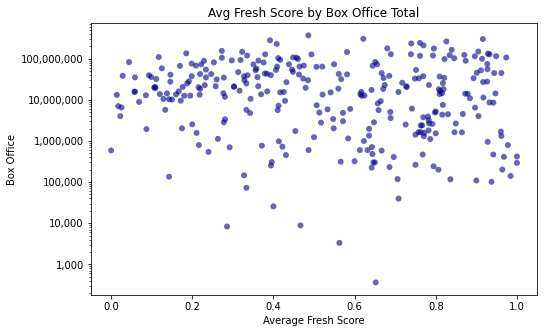

In [37]:
from matplotlib.ticker import StrMethodFormatter

x = rt_boxoffice_df.groupby(['id'])['fresh_score'].mean()
y = rt_boxoffice_df.groupby(['id'])['box_office_numeric'].min()

fig = plt.figure(figsize=(8, 5))
ax = plt.gca()
ax.scatter(x, y, c='darkblue', edgecolors='none',  alpha=.60)
ax.set_yscale('log')
plt.axes().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.title('Avg Fresh Score by Box Office Total')
plt.xlabel('Average Fresh Score')
plt.ylabel('Box Office')
plt.show()

Let's get the coorellation coeef between a movie's average fresh score and it's box office gross.

In [60]:
np.corrcoef(x=rt_boxoffice_df.groupby(['id'])['fresh_score'].mean(), y=rt_boxoffice_df.groupby(['id'])['box_office_numeric'].min())

array([[1.        , 0.05424183],
       [0.05424183, 1.        ]])

As the scatterplot shows us, a movie's average fresh score doesn't really correlate to it's box office gross.

In [57]:
#hacky but works for scatter plotting purposes
print(rt_boxoffice_df.groupby(['id'])['runtime_numeric'].min())
print(rt_boxoffice_df.groupby(['id'])['runtime_numeric'].max())

id
3       108
10       82
13      123
14      117
23      129
       ... 
1976    123
1980    119
1981    129
1986     97
1996    106
Name: runtime_numeric, Length: 299, dtype: int64
id
3       108
10       82
13      123
14      117
23      129
       ... 
1976    123
1980    119
1981    129
1986     97
1996    106
Name: runtime_numeric, Length: 299, dtype: int64


/home/user/anaconda3/envs/flatiron/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


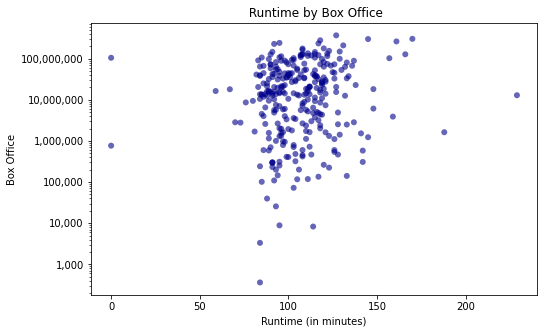

In [63]:
from matplotlib.ticker import StrMethodFormatter

x = rt_boxoffice_df.groupby(['id'])['runtime_numeric'].min()
y = rt_boxoffice_df.groupby(['id'])['box_office_numeric'].min()

fig = plt.figure(figsize=(8, 5))
ax = plt.gca()
ax.scatter(x, y, c='darkblue', edgecolors='none',  alpha=.60)
ax.set_yscale('log')
plt.axes().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.title(' Runtime by Box Office')
plt.xlabel('Runtime (in minutes)')
plt.ylabel('Box Office')
plt.show()

In [61]:
np.corrcoef(x=rt_boxoffice_df.groupby(['id'])['runtime_numeric'].min(), y=rt_boxoffice_df.groupby(['id'])['box_office_numeric'].min())

array([[1.        , 0.19157631],
       [0.19157631, 1.        ]])

As the scatterplot shows us, and the Pearson correlation coefficient of 0.191, a movie's runtime does not strongly correlate to it's box office gross.

In [44]:
#hacky but works for scatter plotting purposes
print(rt_boxoffice_df.groupby(['id'])['film_rating'].min())
print(rt_boxoffice_df.groupby(['id'])['film_rating'].max())

id
3           R
10      PG-13
13          R
14          R
23          R
        ...  
1976       NR
1980    PG-13
1981       NR
1986       PG
1996        R
Name: film_rating, Length: 299, dtype: object
id
3           R
10      PG-13
13          R
14          R
23          R
        ...  
1976       NR
1980    PG-13
1981       NR
1986       PG
1996        R
Name: film_rating, Length: 299, dtype: object


/home/user/anaconda3/envs/flatiron/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


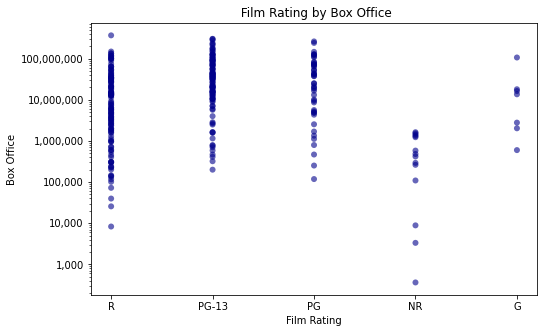

In [49]:
from matplotlib.ticker import StrMethodFormatter

x = rt_boxoffice_df.groupby(['id'])['film_rating'].min()
y = rt_boxoffice_df.groupby(['id'])['box_office_numeric'].min()

fig = plt.figure(figsize=(8, 5))
ax = plt.gca()
ax.scatter(x, y, c='darkblue', edgecolors='none',  alpha=.60)
ax.set_yscale('log')
plt.axes().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.title(' Film Rating by Box Office')
plt.xlabel('Film Rating')
plt.ylabel('Box Office')
plt.show()

# everything below here is a little off...since I was not grouping by id the counts are too high

We want to provide insight into the movies released over a decade. The most recent movie in this set was released in 2018. We will also look at the last 5, and 1 year to see if there are changes/trends that shift from the decade insights.

In [64]:
decade_fresh = rt_reviewed_movies_df.loc[(rt_reviewed_movies_df['theater_year'] >=2009) & (rt_reviewed_movies_df['fresh'] == 'fresh')]
decade_rotten = rt_reviewed_movies_df.loc[(rt_reviewed_movies_df['theater_year'] >=2009) & (rt_reviewed_movies_df['fresh'] == 'rotten')]

Text(0, 0.5, 'Total Fresh Movies')

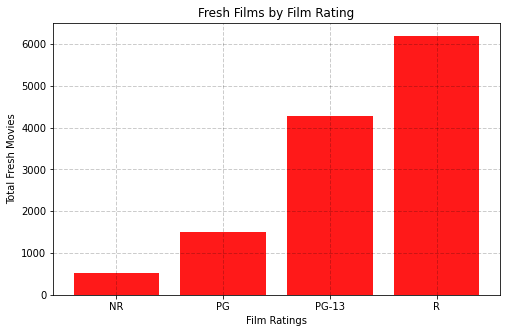

In [68]:
fig = plt.figure(figsize = (8, 5))
plt.bar(decade_fresh.groupby('film_rating')['id'].count().index, decade_fresh.groupby('film_rating')['id'].count(), color = 'red', alpha = 0.90)
plt.grid(color = 'black', alpha = 0.2, linestyle = '--', linewidth = 1)
plt.title('Fresh Films by Film Rating')
plt.xlabel('Film Ratings')
plt.ylabel('Total Fresh Movies')

Text(0, 0.5, 'Total Rotten Movies')

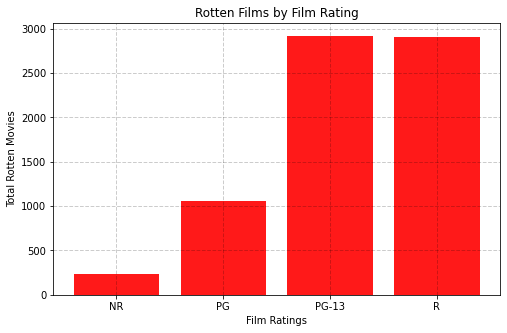

In [69]:
fig = plt.figure(figsize = (8, 5))
plt.bar(decade_rotten.groupby('film_rating')['id'].count().index, decade_rotten.groupby('film_rating')['id'].count(), color = 'red', alpha = 0.90)
plt.grid(color = 'black', alpha = 0.2, linestyle = '--', linewidth = 1)
plt.title('Rotten Films by Film Rating')
plt.xlabel('Film Ratings')
plt.ylabel('Total Rotten Movies')

Text(0.5, 1.0, 'Fresh vs. Rotten in the Last 10 Years (2009-2018)')

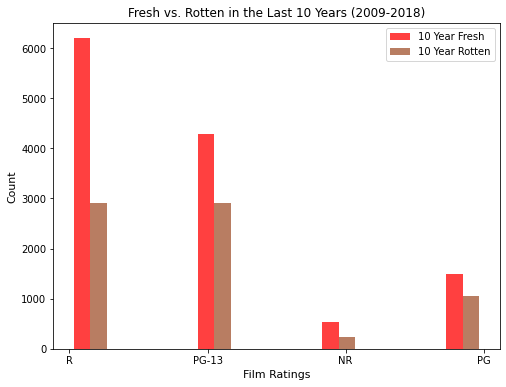

In [70]:
plt.figure(figsize=(8,6))
plt.hist([decade_fresh['film_rating'], decade_rotten['film_rating']], alpha=0.75, color=['red','#A0522D'], label=['10 Year Fresh', '10 Year Rotten'])
plt.legend(loc='upper right')
plt.xlabel("Film Ratings", size=11)
plt.ylabel("Count", size=11)
plt.title("Fresh vs. Rotten in the Last 10 Years (2009-2018)")

In [ ]:
recent_fresh = rt_reviewed_movies_df.loc[(rt_reviewed_movies_df['theater_year'].isin([2018, 2017, 2016, 2015, 2014])) & (rt_reviewed_movies_df['fresh'] =='fresh')]
recent_rotten = rt_reviewed_movies_df.loc[(rt_reviewed_movies_df['theater_year'].isin([2018, 2017, 2016, 2015, 2014])) & (rt_reviewed_movies_df['fresh'] =='rotten')]

In [ ]:
plt.figure(figsize=(8,6))
plt.hist([recent_fresh['film_rating'], recent_rotten['film_rating']], alpha=0.75, color=['red','#A0522D'], label=['5 Year Fresh', '5 Year Rotten'])
plt.legend(loc='upper right')
plt.xlabel("Film Ratings", size=11)
plt.ylabel("Count", size=11)
plt.title("Fresh vs. Rotten in the Last 5 Years (2014-2018)")

In [ ]:
latest_year_fresh = rt_reviewed_movies_df.loc[(rt_reviewed_movies_df['theater_year'] == 2018) & (rt_reviewed_movies_df['fresh'] =='fresh')]
latest_year_rotten = rt_reviewed_movies_df.loc[(rt_reviewed_movies_df['theater_year'] == 2018) & (rt_reviewed_movies_df['fresh'] =='rotten')]

In [ ]:
plt.figure(figsize=(8,6))
plt.hist([latest_year_fresh['film_rating'], latest_year_rotten['film_rating']], alpha=0.75, color=['red','#A0522D'], label=['2018 Fresh', '2018 Rotten'])
plt.legend(loc='upper right')
plt.xlabel("Film Ratings", size=11)
plt.ylabel("Count", size=11)
plt.title("Fresh vs. Rotten in 2018")

In [ ]:
latest_year = rt_reviewed_movies_df.loc[(rt_reviewed_movies_df['theater_year'] == 2018)]

x_val= latest_year.groupby(['id'])['film_rating'].min()
y_val= latest_year.groupby(['id'])['fresh_score'].mean()

import seaborn as sn
fgrid = sns.scatterplot(x=x_val, y=y_val, data=latest_year, color='darkblue', alpha=.4, edgecolor='none')
plt.ylabel('Average Fresh Score')
plt.xlabel('Film Rating')
plt.title('Avg Fresh Score by Film Rating for 2018')

In [ ]:
last_five_years = rt_reviewed_movies_df.loc[(rt_reviewed_movies_df['theater_year'].isin([2018, 2017, 2016, 2015, 2014]))]

x_val= last_five_years.groupby(['id'])['film_rating'].min()
y_val= last_five_years.groupby(['id'])['fresh_score'].mean()

import seaborn as sn
fgrid = sns.scatterplot(x=x_val, y=y_val, data=latest_year, color='darkblue', alpha=.4, edgecolor='none')
plt.ylabel('Average Fresh Score')
plt.xlabel('Film Rating')
plt.title('Avg Fresh Score by Film Rating for 2014-2018')

In [ ]:
last_ten_years = rt_reviewed_movies_df.loc[(rt_reviewed_movies_df['theater_year']<=2009)]

x_val= last_ten_years.groupby(['id'])['film_rating'].min()
y_val= last_ten_years.groupby(['id'])['fresh_score'].mean()

import seaborn as sn
fgrid = sns.scatterplot(x=x_val, y=y_val, data=latest_year, color='darkblue', alpha=.4, edgecolor='none')
plt.ylabel('Average Fresh Score')
plt.xlabel('Film Rating')
plt.title('Avg Fresh Score by Film Rating for 2009-2018')

In [ ]:
print(rt_reviewed_movies_df[bool_series].groupby(['id'])['box_office'].max())
print(rt_reviewed_movies_df[bool_series].groupby(['id'])['box_office'].min())